# Probelem statement  : Use Machine Learning to create a model that predicts which passengers survived the Titanic shipwreck

# Importing The Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading Csv Files From Local Disk

In [2]:
x=pd.read_csv("Downloads\\train.csv")
y=pd.read_csv("Downloads\\test.csv")

In [3]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Storing The Passengerid for Future Requirement

In [4]:
v=y['PassengerId']

# Concating The Train and Test files

In [5]:
y["Survived"]=np.nan
x["data"]="train"
y["data"]="test"
z=pd.concat([x,y],axis=0)

# Removing The Unwanted Columns

In [6]:
del z['PassengerId'],z['Name'],z['Ticket'],z["Cabin"]

# Exploratory Data Analysis

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

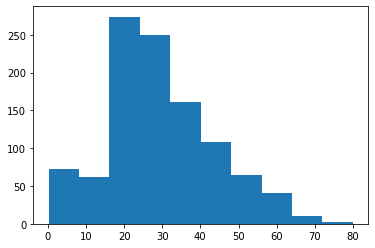

In [7]:
plt.hist(z["Age"])

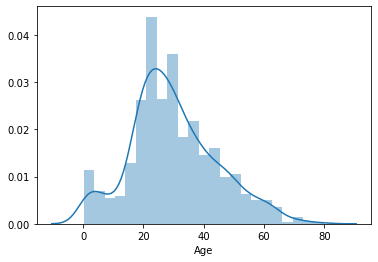

In [8]:
sns.distplot(z["Age"])

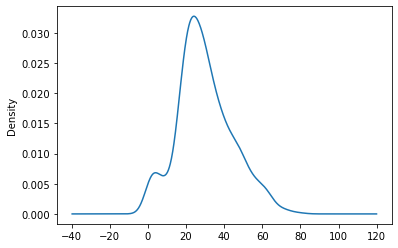

In [9]:
pd.Series(z["Age"]).plot(kind="density")

(array([1070.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

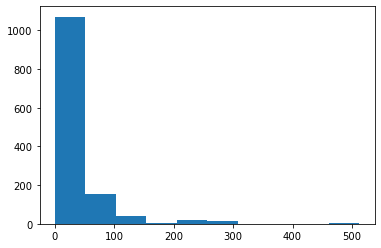

In [10]:
plt.hist(z["Fare"])

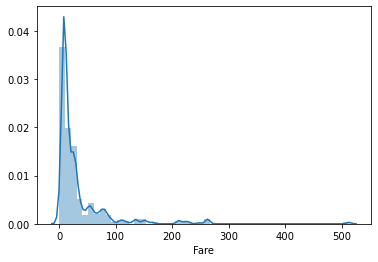

In [11]:
sns.distplot(z["Fare"])

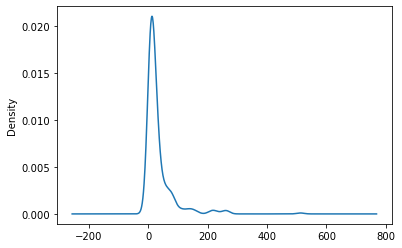

In [12]:
pd.Series(z["Fare"]).plot(kind="density")

In [13]:
c=z["Pclass"].value_counts()

<BarContainer object of 3 artists>

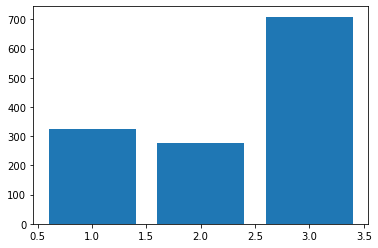

In [14]:
plt.bar(c.index,c.values)

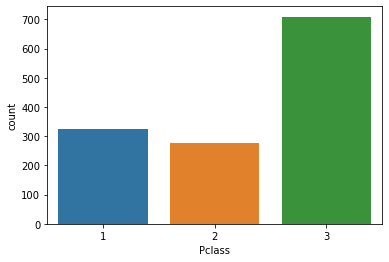

In [15]:
sns.countplot(z["Pclass"])

In [16]:
k=z["SibSp"].value_counts()

<BarContainer object of 7 artists>

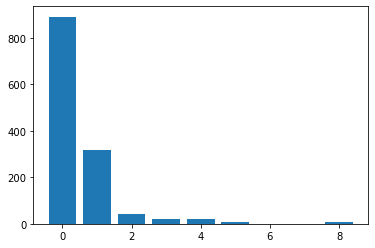

In [17]:
plt.bar(k.index,k.values)

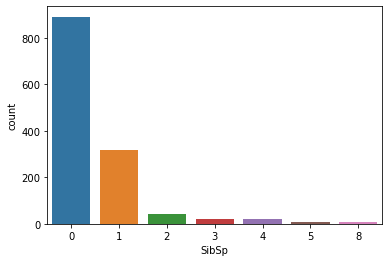

In [18]:
sns.countplot(z["SibSp"])

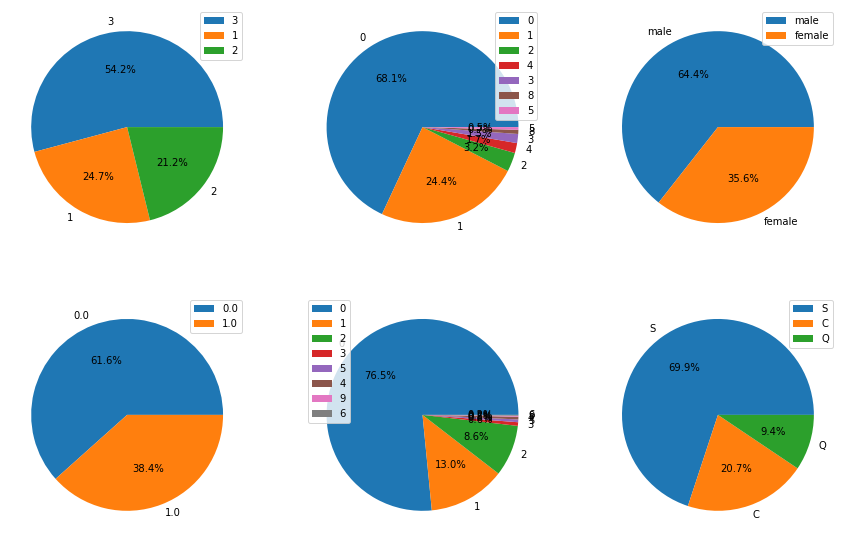

In [19]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
a=z["Pclass"].value_counts().values
b=z["Pclass"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")
plt.legend()

plt.subplot(3,3,2)
a=z["SibSp"].value_counts().values
b=z["SibSp"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")
plt.legend()

plt.subplot(3,3,3)
a=z["Sex"].value_counts().values
b=z["Sex"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")
plt.legend()

plt.subplot(3,3,4)
a=z["Survived"].value_counts().values
b=z["Survived"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")
plt.legend()

plt.subplot(3,3,5)
a=z["Parch"].value_counts().values
b=z["Parch"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")
plt.legend()

plt.subplot(3,3,6)
a=z["Embarked"].value_counts().values
b=z["Embarked"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")
plt.legend()


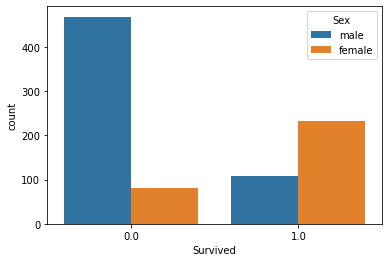

In [20]:
sns.countplot(x="Survived",hue="Sex",data=z)

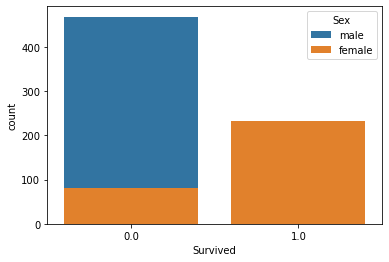

In [21]:
sns.countplot(x="Survived",hue="Sex",data=z,dodge=False)

Text(0, 0.5, 'COUNT')

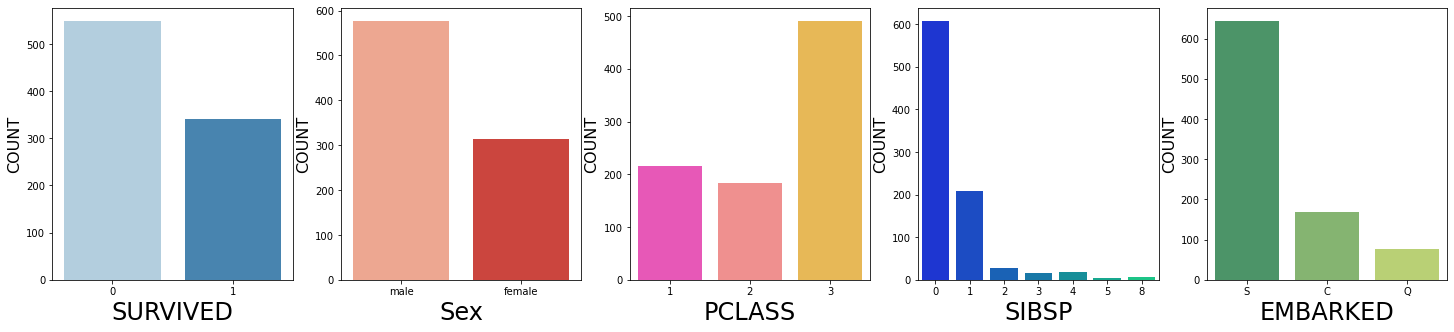

In [22]:
fig,ax=plt.subplots(ncols=5,figsize=(25,5))
sns.countplot(x["Survived"],ax=ax[0],palette="Blues")
ax[0].set_xlabel("SURVIVED",fontsize=24)
ax[0].set_ylabel("COUNT",fontsize=16)

sns.countplot(x["Sex"],ax=ax[1],palette="Reds")
ax[1].set_xlabel("Sex",fontsize=24)
ax[1].set_ylabel("COUNT",fontsize=16)

sns.countplot(x["Pclass"],ax=ax[2],palette="spring")
ax[2].set_xlabel("PCLASS",fontsize=24)
ax[2].set_ylabel("COUNT",fontsize=16)

sns.countplot(x["SibSp"],ax=ax[3],palette="winter")
ax[3].set_xlabel("SIBSP",fontsize=24)
ax[3].set_ylabel("COUNT",fontsize=16)

sns.countplot(x["Embarked"],ax=ax[4],palette="summer")
ax[4].set_xlabel("EMBARKED",fontsize=24)
ax[4].set_ylabel("COUNT",fontsize=16)

# Data Pre-Processing

In [23]:
z["Survived"].fillna(1.0,inplace=True)

In [24]:
z["Survived"]=z["Survived"].astype(int)

In [25]:
z['Age'].fillna(z["Age"].mean(),inplace=True)

In [26]:
z["Fare"].fillna(z["Fare"].mean(),inplace=True)

In [27]:
z["Embarked"].fillna("Q",inplace=True)

In [28]:
z["Sex"]=z["Sex"].map({"male":1,"female":0})
z["Embarked"]=z["Embarked"].map({"S":0,"C":1,"Q":2})

# Data Modelling

In [29]:
x=z[z["data"]=="train"]
del x["data"]
y=z[z["data"]=="test"]
y.drop(["Survived","data"],axis=1,inplace=True)

In [30]:
del z

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [32]:
a,b=train_test_split(x,test_size=0.2,random_state=123)

In [33]:
m=a.drop(["Survived"],axis=1)
n=a["Survived"]

In [34]:
log=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=10,max_features="auto",random_state=123)
rf=RandomForestClassifier(n_estimators=200,max_depth=8,max_features="sqrt",min_samples_leaf=10,random_state=123)
gb=GradientBoostingClassifier(n_estimators=300,max_depth=12,max_leaf_nodes=10,subsample=0.4,learning_rate=0.01,random_state=123)
ex=ExtraTreesClassifier(n_estimators=200,max_depth=12,max_leaf_nodes=20,random_state=123)
xg=XGBClassifier(n_estimators=300,max_depth=12,learning_rate=0.01,subsample=0.5,random_state=123)
k=KNeighborsClassifier(n_neighbors=6)
s=SVC(kernel="rbf",gamma=0.2,C=0.1,probability=True)

In [35]:
m=pd.get_dummies(m,drop_first=True)

In [36]:
log.fit(m,n)

LogisticRegression()

In [37]:
dt.fit(m,n)

DecisionTreeClassifier(max_depth=8, max_features='auto', max_leaf_nodes=10,
                       random_state=123)

In [38]:
rf.fit(m,n)

RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=200, random_state=123)

In [39]:
gb.fit(m,n)

GradientBoostingClassifier(learning_rate=0.01, max_depth=12, max_leaf_nodes=10,
                           n_estimators=300, random_state=123, subsample=0.4)

In [40]:
ex.fit(m,n)

ExtraTreesClassifier(max_depth=12, max_leaf_nodes=20, n_estimators=200,
                     random_state=123)

In [41]:
xg.fit(m,n)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
k.fit(m,n)

KNeighborsClassifier(n_neighbors=6)

In [43]:
s.fit(m,n)

SVC(C=0.1, gamma=0.2, probability=True)

In [44]:
m1=b.drop(["Survived"],axis=1)

In [45]:
pred=log.predict(m1)
pred1=dt.predict(m1)
pred2=rf.predict(m1)
pred3=gb.predict(m1)
pred4=ex.predict(m1)
pred5=xg.predict(m1)
pred6=k.predict(m1)
pred7=s.predict(m1)

# Evulation Metric

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

Text(0.5, 1.0, 'DECISION TREE CONFUSION MATRIX')

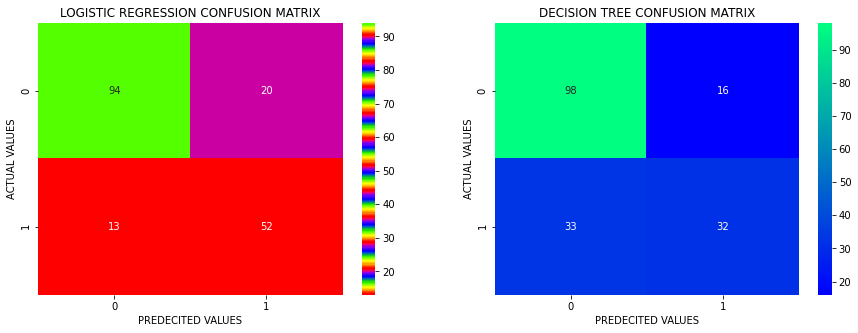

In [47]:
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(b["Survived"],pred),annot=True,fmt=".0f",ax=axes[0],cmap="prism")
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("LOGISTIC REGRESSION CONFUSION MATRIX")

sns.heatmap(confusion_matrix(b["Survived"],pred1),annot=True,fmt=".0f",ax=axes[1],cmap="winter")
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("DECISION TREE CONFUSION MATRIX")




Text(0.5, 1.0, 'GRADIENT BOOSTING CONFUSION MATRIX')

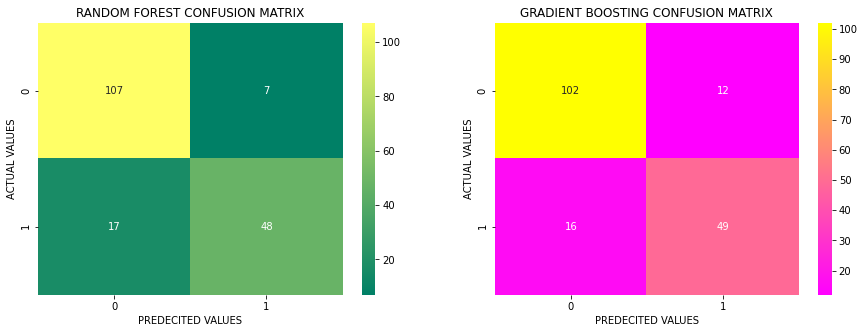

In [48]:
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(b["Survived"],pred2),annot=True,fmt=".0f",ax=axes[0],cmap="summer")
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("RANDOM FOREST CONFUSION MATRIX")

sns.heatmap(confusion_matrix(b["Survived"],pred3),annot=True,fmt=".0f",ax=axes[1],cmap="spring")
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("GRADIENT BOOSTING CONFUSION MATRIX")

Text(0.5, 1.0, 'XGBOOST CONFUSION MATRIX')

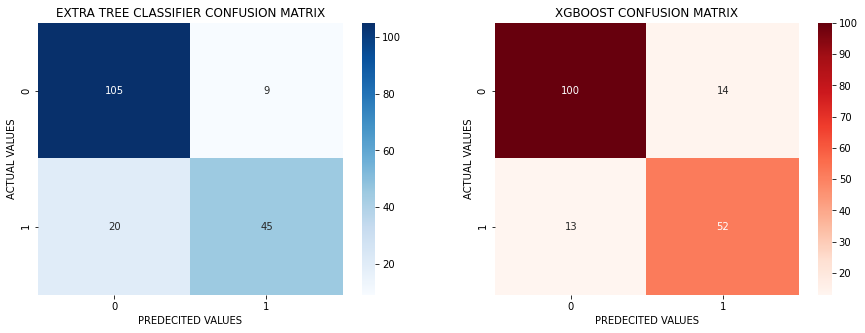

In [49]:
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(b["Survived"],pred4),annot=True,fmt=".0f",ax=axes[0],cmap="Blues")
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("EXTRA TREE CLASSIFIER CONFUSION MATRIX")

sns.heatmap(confusion_matrix(b["Survived"],pred5),annot=True,fmt=".0f",ax=axes[1],cmap="Reds")
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("XGBOOST CONFUSION MATRIX")

Text(0.5, 1.0, 'SUPPORT VECTOR MACHINE  CONFUSION MATRIX')

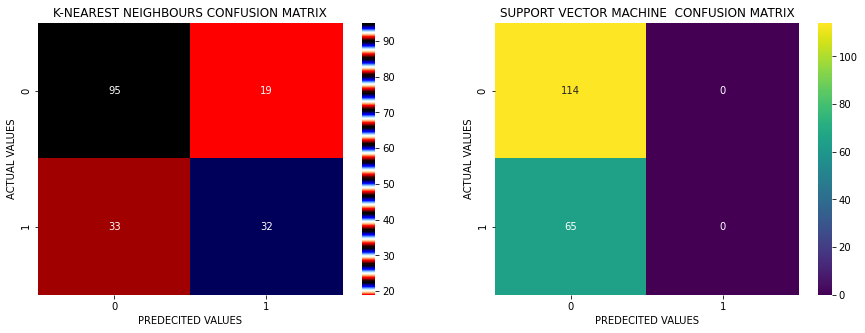

In [50]:
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(b["Survived"],pred6),annot=True,fmt=".0f",ax=axes[0],cmap="flag")
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("K-NEAREST NEIGHBOURS CONFUSION MATRIX")

sns.heatmap(confusion_matrix(b["Survived"],pred7),annot=True,fmt=".0f",ax=axes[1],cmap="viridis")
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("SUPPORT VECTOR MACHINE  CONFUSION MATRIX")

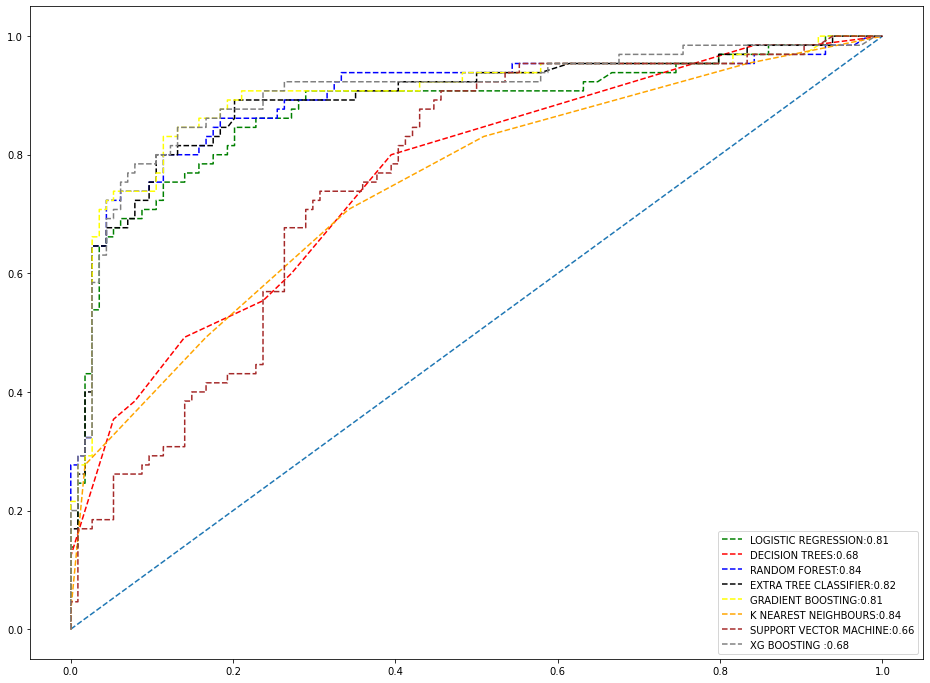

In [51]:
predict1=log.predict_proba(m1) [:,1]
predict2=dt.predict_proba(m1) [:,1]
predict3=rf.predict_proba(m1) [:,1]
predict4=ex.predict_proba(m1) [:,1]
predict5=gb.predict_proba(m1) [:,1]
predict6=k.predict_proba(m1) [:,1]
predict7=s.predict_proba(m1) [:,1]
predict8=xg.predict_proba(m1) [:,1]
fpr,tpr,t=roc_curve(b["Survived"],predict1)
fpr1,tpr1,t1=roc_curve(b["Survived"],predict2)
fpr2,tpr2,t2=roc_curve(b["Survived"],predict3)
fpr3,tpr3,t3=roc_curve(b["Survived"],predict4)
fpr4,tpr4,t4=roc_curve(b["Survived"],predict5)
fpr5,tpr5,t5=roc_curve(b["Survived"],predict6)
fpr6,tpr6,t6=roc_curve(b["Survived"],predict7)
fpr7,tpr7,t7=roc_curve(b["Survived"],predict8)
plt.figure(figsize=(16,12))
plt.plot([0,1],[0,1],"--")
plt.plot(fpr,tpr,"--",color="green",label="LOGISTIC REGRESSION:" +str(round(roc_auc_score(b["Survived"],pred*100),2)))
plt.plot(fpr1,tpr1,"--",color="red",label="DECISION TREES:" +str(round(roc_auc_score(b["Survived"],pred1*100),2)))
plt.plot(fpr2,tpr2,"--",color="blue",label="RANDOM FOREST:" +str(round(roc_auc_score(b["Survived"],pred2*100),2)))
plt.plot(fpr3,tpr3,"--",color="black",label="EXTRA TREE CLASSIFIER:" +str(round(roc_auc_score(b["Survived"],pred3*100),2)))
plt.plot(fpr4,tpr4,"--",color="yellow",label="GRADIENT BOOSTING:" +str(round(roc_auc_score(b["Survived"],pred4*100),2)))
plt.plot(fpr5,tpr5,"--",color="orange",label="K NEAREST NEIGHBOURS:" +str(round(roc_auc_score(b["Survived"],pred5*100),2)))
plt.plot(fpr6,tpr6,"--",color="brown",label="SUPPORT VECTOR MACHINE:" +str(round(roc_auc_score(b["Survived"],pred6*100),2)))
plt.plot(fpr7,tpr7,"--",color="grey",label="XG BOOSTING :" +str(round(roc_auc_score(b["Survived"],pred1*100),2)))
plt.legend()

[Text(386.3076923076923, 570.7800000000001, 'Parch <= 0.5\ngini = 0.475\nsamples = 100.0%\nvalue = [0.611, 0.389]'),
 Text(206.03076923076924, 407.70000000000005, 'SibSp <= 0.5\ngini = 0.452\nsamples = 76.7%\nvalue = [0.656, 0.344]'),
 Text(103.01538461538462, 244.62, 'Embarked <= 0.5\ngini = 0.422\nsamples = 60.8%\nvalue = [0.697, 0.303]'),
 Text(51.50769230769231, 81.53999999999996, '\n  (...)  \n'),
 Text(154.52307692307693, 81.53999999999996, '\n  (...)  \n'),
 Text(309.04615384615386, 244.62, 'Pclass <= 1.5\ngini = 0.5\nsamples = 15.9%\nvalue = [0.496, 0.504]'),
 Text(257.53846153846155, 81.53999999999996, '\n  (...)  \n'),
 Text(360.55384615384617, 81.53999999999996, '\n  (...)  \n'),
 Text(566.5846153846154, 407.70000000000005, 'SibSp <= 2.5\ngini = 0.497\nsamples = 23.3%\nvalue = [0.464, 0.536]'),
 Text(515.0769230769231, 244.62, 'Pclass <= 2.5\ngini = 0.461\nsamples = 18.7%\nvalue = [0.361, 0.639]'),
 Text(463.5692307692308, 81.53999999999996, '\n  (...)  \n'),
 Text(566.58461

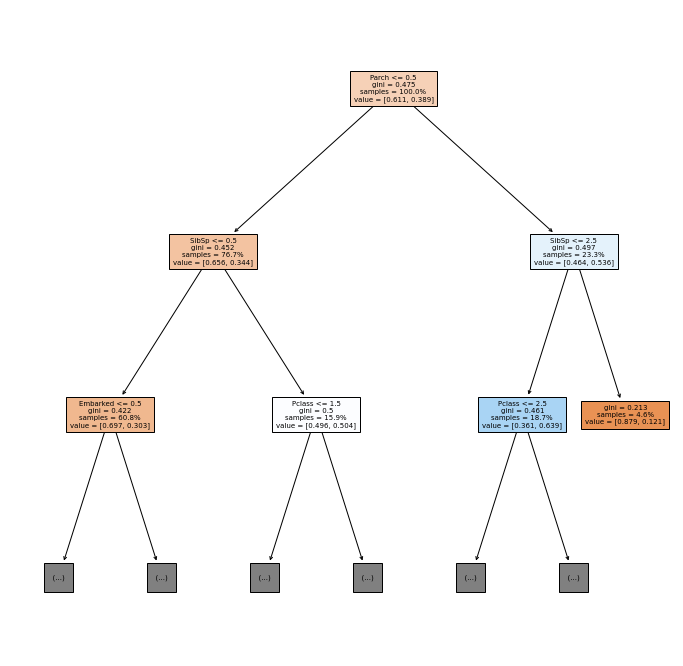

In [52]:
plt.figure(figsize=(12,12))
plot_tree(dt,feature_names=y.columns,filled=True,proportion=True,fontsize=7,max_depth=2)

In [53]:
s=[]
acc=round(accuracy_score(b["Survived"],pred),2)
acc1=round(accuracy_score(b["Survived"],pred1),2)
acc2=round(accuracy_score(b["Survived"],pred2),2)
acc3=round(accuracy_score(b["Survived"],pred3),2)
acc4=round(accuracy_score(b["Survived"],pred4),2)
acc5=round(accuracy_score(b["Survived"],pred5),2)
acc6=round(accuracy_score(b["Survived"],pred6),2)
acc7=round(accuracy_score(b["Survived"],pred7),2)
s.append(acc)
s.append(acc1)
s.append(acc2)
s.append(acc3)
s.append(acc4)
s.append(acc5)
s.append(acc6)
s.append(acc7)

In [54]:
s1=[]
roc=round(roc_auc_score(b["Survived"],pred),2)
roc1=round(roc_auc_score(b["Survived"],pred1),2)
roc2=round(roc_auc_score(b["Survived"],pred2),2)
roc3=round(roc_auc_score(b["Survived"],pred3),2)
roc4=round(roc_auc_score(b["Survived"],pred4),2)
roc5=round(roc_auc_score(b["Survived"],pred5),2)
roc6=round(roc_auc_score(b["Survived"],pred6),2)
roc7=round(roc_auc_score(b["Survived"],pred7),2)
s1.append(roc)
s1.append(roc1)
s1.append(roc2)
s1.append(roc3)
s1.append(roc4)
s1.append(roc5)
s1.append(roc6)
s1.append(roc7)


In [55]:
s1

[0.81, 0.68, 0.84, 0.82, 0.81, 0.84, 0.66, 0.5]

In [56]:
s

[0.82, 0.73, 0.87, 0.84, 0.84, 0.85, 0.71, 0.64]

In [57]:
s3=[s,s1]

In [58]:
s4=pd.DataFrame(s3)

In [59]:
s4=s4.T

In [60]:
s4.index=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","GRADIENT BOOSTING","EXTRA TREE CLASSIFIER","XGBOOSTING","K NEAREST NEIGHBOURS","SUPPORT VECTOR MACHINES"]
s4.columns=["ACCURACY","AUC SCORE"]

In [61]:
s4

,ACCURACY,AUC SCORE
LOGISTIC REGRESSION,0.82,0.81
DECISION TREE,0.73,0.68
RANDOM FOREST,0.87,0.84
GRADIENT BOOSTING,0.84,0.82
EXTRA TREE CLASSIFIER,0.84,0.81
XGBOOSTING,0.85,0.84
K NEAREST NEIGHBOURS,0.71,0.66
SUPPORT VECTOR MACHINES,0.64,0.50


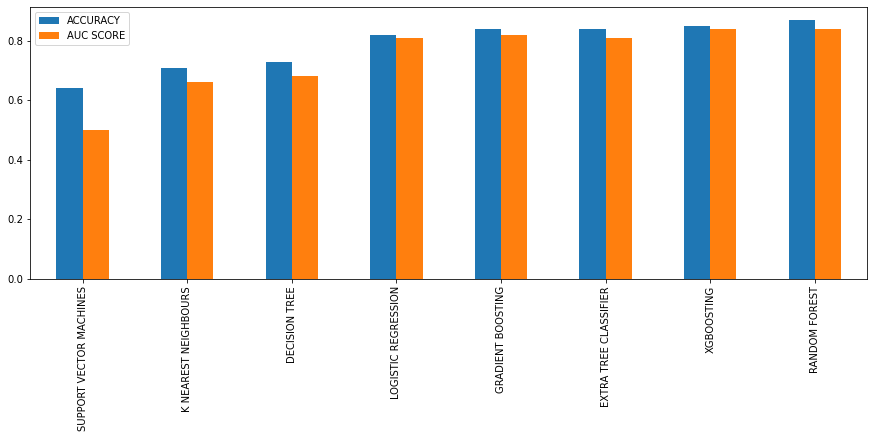

In [62]:
s4.sort_values(by="ACCURACY").plot(kind="bar",figsize=(15,5))

# Final Predections

In [63]:
c=x.drop(["Survived"],axis=1)
d=x["Survived"]

In [64]:
log.fit(c,d)

LogisticRegression()

In [65]:
rf.fit(c,d)

RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=200, random_state=123)

In [66]:
gb.fit(c,d)

GradientBoostingClassifier(learning_rate=0.01, max_depth=12, max_leaf_nodes=10,
                           n_estimators=300, random_state=123, subsample=0.4)

In [67]:
dt.fit(c,d)

DecisionTreeClassifier(max_depth=8, max_features='auto', max_leaf_nodes=10,
                       random_state=123)

In [68]:
xg.fit(c,d)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
ex.fit(c,d)

ExtraTreesClassifier(max_depth=12, max_leaf_nodes=20, n_estimators=200,
                     random_state=123)

In [71]:
k.fit(c,d)

KNeighborsClassifier(n_neighbors=6)

In [72]:
predict11=log.predict(y)

In [74]:
l1=pd.DataFrame(predict11)

In [79]:
l1.columns=["LOGISTIC REGRESSION PREDECTIONS"]

In [84]:
l1.head()

,LOGISTIC REGRESSION PREDECTIONS
0,0
1,0
2,0
3,0
4,1


In [81]:
predict12=dt.predict(y)

In [82]:
l2=pd.DataFrame(predict12)

In [83]:
l2.columns=["DECISION TREE PREDECTIONS"]

In [85]:
l2.head()

,DECISION TREE PREDECTIONS
0,0
1,1
2,0
3,0
4,1


In [86]:
predict13=rf.predict(y)

In [87]:
l3=pd.DataFrame(predict13)

In [88]:
l3.columns=["RANDOM FOREST PREDECTIONS"]

In [89]:
l3.head()

,RANDOM FOREST PREDECTIONS
0,0
1,0
2,0
3,0
4,0


In [90]:
predict14=gb.predict(y)

In [91]:
l4=pd.DataFrame(predict14)

In [92]:
l4.columns=["GRADIENT BOOSTING PREDECTIONS"]

In [93]:
l4.head()

,GRADIENT BOOSTING PREDECTIONS
0,0
1,0
2,0
3,0
4,0


In [94]:
predict15=xg.predict(y)

In [95]:
l5=pd.DataFrame(predict15)

In [96]:
l5.columns=["XG BOOSTING PREDECCTIONS"]

In [97]:
l5.head()

,XG BOOSTING PREDECCTIONS
0,0
1,0
2,0
3,0
4,0


In [98]:
predict16=ex.predict(y)

In [99]:
l6=pd.DataFrame(predict16)

In [100]:
l6.columns=["EXTRA TREE CLASSIFIER"]

In [101]:
l6.head()

,EXTRA TREE CLASSIFIER
0,0
1,0
2,0
3,0
4,0


In [102]:
predict17=k.predict(y)

In [103]:
l7=pd.DataFrame(predict17)

In [104]:
l7.columns=["K NEAREST NEIGHBOURS"]

In [106]:
l7.head()

,K NEAREST NEIGHBOURS
0,0
1,0
2,0
3,0
4,0
